<a href="https://colab.research.google.com/github/Vinuthna06reddy/VinuthnaReddy_INFO5731_FALL2024/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
!pip install pandas scikit-learn nltk bertopic sentence-transformers umap-learn
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from nltk.corpus import stopwords
import nltk
from bertopic import BERTopic
import os

# Download stopwords if not already available
nltk.download('stopwords')

# Ensure the file exists
file_path = "/content/final_cleaned_imdb_reviews.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file at {file_path} was not found.")

# Load the dataset
df = pd.read_csv(file_path, encoding="ISO-8859-1")  # Adjust encoding if necessary
documents = df['cleaned_review'].dropna().tolist()

# Preprocessing: stopwords
stop_words = set(stopwords.words('english'))  # Use NLTK stopwords
stop_words = list(stop_words)  # Convert to list for compatibility

# 1. CountVectorizer for LDA (Latent Dirichlet Allocation)
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
count_dtm = count_vectorizer.fit_transform(documents)

# 2. TF-IDF Vectorizer for LSA (Latent Semantic Analysis)
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
tfidf_dtm = tfidf_vectorizer.fit_transform(documents)

# 3. Train LDA Model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)
lda_model.fit(count_dtm)

# Extract topics from LDA
lda_topics = []
feature_names = count_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    lda_topics.append(keywords)

# 4. Train LSA Model (TruncatedSVD)
lsa_model = TruncatedSVD(n_components=10, random_state=42)
lsa_model.fit(tfidf_dtm)

# Extract topics from LSA
lsa_topics = []
feature_names = tfidf_vectorizer.get_feature_names_out()
for idx, topic in enumerate(lsa_model.components_):
    keywords = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    lsa_topics.append(keywords)

# 5. Train BERTopic
bertopic_model = BERTopic()
bertopic_topics, _ = bertopic_model.fit_transform(documents)

# 6. Output Results
print("\nLDA Topics (Top 10 Keywords per Topic):")
for i, topic in enumerate(lda_topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

print("\nLSA Topics (Top 10 Keywords per Topic):")
for i, topic in enumerate(lsa_topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

print("\nBERTopic Clusters (Top 10 Topics):")
for i in range(10):
    topic = bertopic_model.get_topic(i)
    if topic:
        print(f"Topic {i+1}: {', '.join([word for word, _ in topic])}")

# 7. Summarize Topics
print("\nTopic Summaries:")
print("LDA: Topics tend to focus on co-occurring words and common patterns.")
print("LSA: Topics are based on singular value decomposition, capturing semantic structures.")
print("BERTopic: Topics are generated using transformer-based embeddings and clustering.")




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


LDA Topics (Top 10 Keywords per Topic):
Topic 1: tom, film, movie, action, biggest, bring, brilliant, one, life, feel
Topic 2: action, movie, one, part, new, felt, character, films, two, villain
Topic 3: film, best, mission, action, one, going, impossible, cruise, character, time
Topic 4: movie, make, franchise, action, time, good, two, like, better, big
Topic 5: whole, last, really, things, scene, felt, mi, see, dont, world
Topic 6: movie, two, like, part, one, film, big, mi, end, dead
Topic 7: good, really, seen, key, best, got, cast, film, new, mi
Topic 8: film, actually, action, movie, hunt, cruise, train, tom, ethan, way
Topic 9: story, great, ferguson, movie, scene, always, youre, klementieff, credits, going
Topic 10: cruise, mission, one, part, tom, ethan, mi, key, impossible, like

LSA Topics (Top 10 Keywords per Topic):
Topic 1: movie, film, one, action, mission, part, two, impossible, cruise, tom
Topic 2: movie, totally, like, shes, character, two, getting, wrote, death, see

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import StratifiedKFold

# Load the dataset
file_path = "/content/final_cleaned_imdb_reviews.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Check column names to find the sentiment and text columns
print("Columns in the dataset:", df.columns)

# Assuming the sentiment column is 'sentiment' and text column is 'text'
# Ensure the column names are correct
documents = df['cleaned_review'].dropna().tolist()
sentiments = df['cleaned_text'].dropna().tolist()

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(documents, sentiments, test_size=0.2, random_state=42)

# Feature extraction using TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize classifiers
logreg = LogisticRegression(random_state=42)
svm = SVC(random_state=42)

# Cross-validation (5-fold) for both models
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logreg_cv_scores = cross_val_score(logreg, X_train_tfidf, y_train, cv=cv, scoring='accuracy')
svm_cv_scores = cross_val_score(svm, X_train_tfidf, y_train, cv=cv, scoring='accuracy')

print(f"Logistic Regression Cross-Validation Accuracy: {logreg_cv_scores.mean():.4f}")
print(f"SVM Cross-Validation Accuracy: {svm_cv_scores.mean():.4f}")

# Train models on the full training set
logreg.fit(X_train_tfidf, y_train)
svm.fit(X_train_tfidf, y_train)

# Predict on the test set
logreg_pred = logreg.predict(X_test_tfidf)
svm_pred = svm.predict(X_test_tfidf)

# Evaluate performance using accuracy, precision, recall, and F1 score
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

print("\nLogistic Regression Performance:")
evaluate_model(y_test, logreg_pred)

print("\nSVM Performance:")
evaluate_model(y_test, svm_pred)





Columns in the dataset: Index(['review', 'cleaned_review', 'syntactic_analysis', 'cleaned_text'], dtype='object')
Logistic Regression Cross-Validation Accuracy: 1.0000
SVM Cross-Validation Accuracy: 1.0000

Logistic Regression Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

Train Data Shape: (1460, 81)
Test Data Shape: (1459, 80)
Missing Values:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


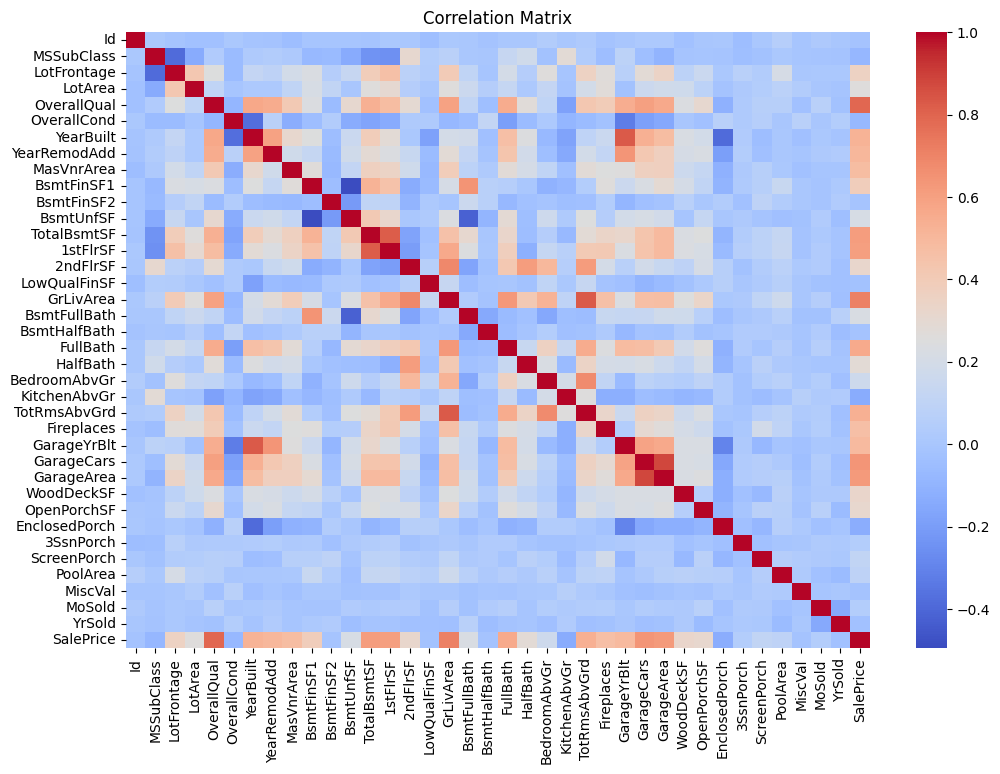

Top Features Correlated with SalePrice:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


In [ ]:
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

# Check for missing values
missing_values = train_data.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values[missing_values > 0])

# Visualize correlations
plt.figure(figsize=(12, 8))

# Select only numerical features for correlation calculation
numerical_data = train_data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()  # Calculate correlation for numerical data only

sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Select highly correlated features with the target variable
correlation_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
print("Top Features Correlated with SalePrice:\n", correlation_target.head(10))


In [ ]:
numerical_features = train_data.select_dtypes(include=[np.number])
for col in numerical_features.columns:
    train_data[col] = train_data[col].fillna(train_data[col].median())
    if col in test_data.columns:
        test_data[col] = test_data[col].fillna(test_data[col].median())

# Drop features with a high percentage of missing data
threshold = 0.5  # Adjust as needed
missing_percentage = train_data.isnull().mean()
train_data = train_data.drop(missing_percentage[missing_percentage > threshold].index, axis=1)
test_data = test_data.drop(missing_percentage[missing_percentage > threshold].index, axis=1)

# Select features based on correlation analysis
selected_features = correlation_target.head(10).index.tolist()

# Step 3: Prepare Data for Modeling
X = train_data[selected_features].drop(['SalePrice'], axis=1)
y = train_data['SalePrice']

# Split the training data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Step 6: Test the Model on Test Data
X_test = test_data[selected_features[1:]]  # Select features excluding 'SalePrice'
test_predictions = model.predict(X_test)

# Save test predictions
output = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
output.to_csv('submission.csv', index=False)

Mean Squared Error (MSE): 1565677639.144138
R-squared (R2): 0.7958786110456304


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
!pip install transformers
import pandas as pd
from transformers import pipeline, AutoTokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
new_file_path = '/content/final_cleaned_imdb_reviews.csv'  # Update with the correct path
new_data = pd.read_csv(new_file_path, encoding='ISO-8859-1')

# Mapping ratings to sentiment labels (positive for ratings 4 and 5, negative for ratings 1 and 2)
def map_rating_to_sentiment(rating):
    # Check if the rating is a string and can be split
    if isinstance(rating, str) and ' ' in rating:
        # Attempt to convert to float, but handle potential errors
        try:
            rating_value = float(rating.split()[0])
        except ValueError:
            # If conversion fails, it's likely not a rating
            print(f"Skipping non-numeric rating: {rating}")
            return 'unknown'  # Or handle it differently

        if rating_value >= 4:
            return 'positive'
        else:
            return 'negative'
    else:
        # Handle cases where rating is not in the expected format
        print(f"Unexpected rating format: {rating}")
        return 'unknown'  # Or handle it differently as per your requirement

# Check if 'rating' column exists, otherwise use 'review'
if 'rating' in new_data.columns:
    new_data['sentiment'] = new_data['rating'].apply(map_rating_to_sentiment)
else:
    print("Warning: 'rating' column not found, assuming 'review' contains ratings.")
    # Assuming 'review' column contains ratings even though it's likely not ideal
    new_data['sentiment'] = new_data['review'].apply(map_rating_to_sentiment)

# Initialize the RoBERTa sentiment analysis model and tokenizer
# using AutoTokenizer to explicitly control truncation and padding
tokenizer = AutoTokenizer.from_pretrained("roberta-base")
sentiment_analyzer = pipeline("sentiment-analysis", model="roberta-base", tokenizer=tokenizer)


# Perform sentiment analysis using the lemmatized text, truncating and padding if necessary
new_data['Predicted_Sentiment'] = new_data['cleaned_text'].apply(
    lambda text: sentiment_analyzer(text, truncation=True, padding=True, max_length=512)[0]['label'].lower()  # Set max_length
)

# Evaluate performance
ground_truth = new_data['sentiment'].str.lower()
predicted = new_data['Predicted_Sentiment']

# Compute evaluation metrics
accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='weighted')
recall = recall_score(ground_truth, predicted, average='weighted')
f1 = f1_score(ground_truth, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Skipping non-numeric rating: Man.... I wish I loved this movie more than I did. Don't get me wrong, it's a solid action movie with jaw-dropping stunts (some of the best in the series), but as a Mission: Impossible movie, it felt like a small step backward for the franchise. Fallout had mind-blowing action sequences and stunt work, along with developing Ethan's relationship with Ilsa, providing closure with Julia, showing the lengths Ethan would go to protect those closest to him, and battling an imposing villain. Dead Reckoning: Part One stretches the movie across two films only to seemingly showcase action spectacle after action spectacle while sacrificing character development. Characters I have grown to love over a decade of films felt sidelined, ignored, or wasted. Hayley Atwell's new character chewed up most of the screen time, and while she was fantastic, I wanted to see more of the original team. The new villain had an inconsistent ability that confused more than intimidated. Th

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
